# Machine Learning Assignment 1 - part 1

### Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Helper Function

In [2]:
def print_line():
    print('=================================================')


# Q1: Housing Price Prediction

### Part 1: Reading Dataset

In [3]:
train_data_path = 'Datasets\Housingdata\Housing_Train.csv'
test_data_path = 'Datasets\Housingdata\Housing_Test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,NaN,22.5
1,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
3,NaN,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
4,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.0
401,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5
402,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
403,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


In [5]:
test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
4,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
97,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10
98,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
99,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


### Part 2: Purifying Dataset

### Code Info, Description, and IsNA cells

In [6]:
# Information of training data
train_info = train_data.info()
train_description = train_data.describe()
train_null_cells = train_data.isna()

print_line()

# Information of test data
test_info = test_data.info()
test_description = test_data.describe()
test_null_cells = test_data.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     388 non-null    float64
 1   ZN       390 non-null    float64
 2   INDUS    391 non-null    float64
 3   CHAS     389 non-null    float64
 4   NOX      405 non-null    float64
 5   RM       405 non-null    float64
 6   AGE      390 non-null    float64
 7   DIS      405 non-null    float64
 8   RAD      405 non-null    int64  
 9   TAX      405 non-null    int64  
 10  PTRATIO  405 non-null    float64
 11  B        405 non-null    float64
 12  LSTAT    387 non-null    float64
 13  MEDV     405 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 44.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     98 non-null     float64
 1   ZN       96

### Mean Values

In [7]:
# Mean values for replacement of null cells
train_mean_values = mean_values = train_data.describe().loc['mean']
test_mean_values = mean_values = test_data.describe().loc['mean']

print(train_mean_values)
print_line()
print(test_mean_values)

CRIM         3.697335
ZN          10.703846
INDUS       11.281662
CHAS         0.069409
NOX          0.556731
RM           6.274990
AGE         68.864359
DIS          3.759377
RAD          9.758025
TAX        411.471605
PTRATIO     18.528642
B          356.567062
LSTAT       13.021473
MEDV        22.262469
Name: mean, dtype: float64
CRIM         3.273519
ZN          13.276042
INDUS       10.270421
CHAS         0.072165
NOX          0.546532
RM           6.323307
AGE         67.113542
DIS          3.938057
RAD          8.712871
TAX        395.267327
PTRATIO     18.162376
B          357.102970
LSTAT       11.519091
Name: mean, dtype: float64


### Fill NA Values in Train and Test data

In [8]:
for header in train_data.columns:
    train_data[header].fillna(train_mean_values[header], inplace=True)

for header in test_data.columns:
    test_data[header].fillna(test_mean_values[header], inplace=True)

Additional check to see if there are any null cells after filling them with columns mean values

In [9]:
print(train_data.isna().__contains__(True))
print(test_data.isna().__contains__(True))

False
False


# Part 3: Data Visualization

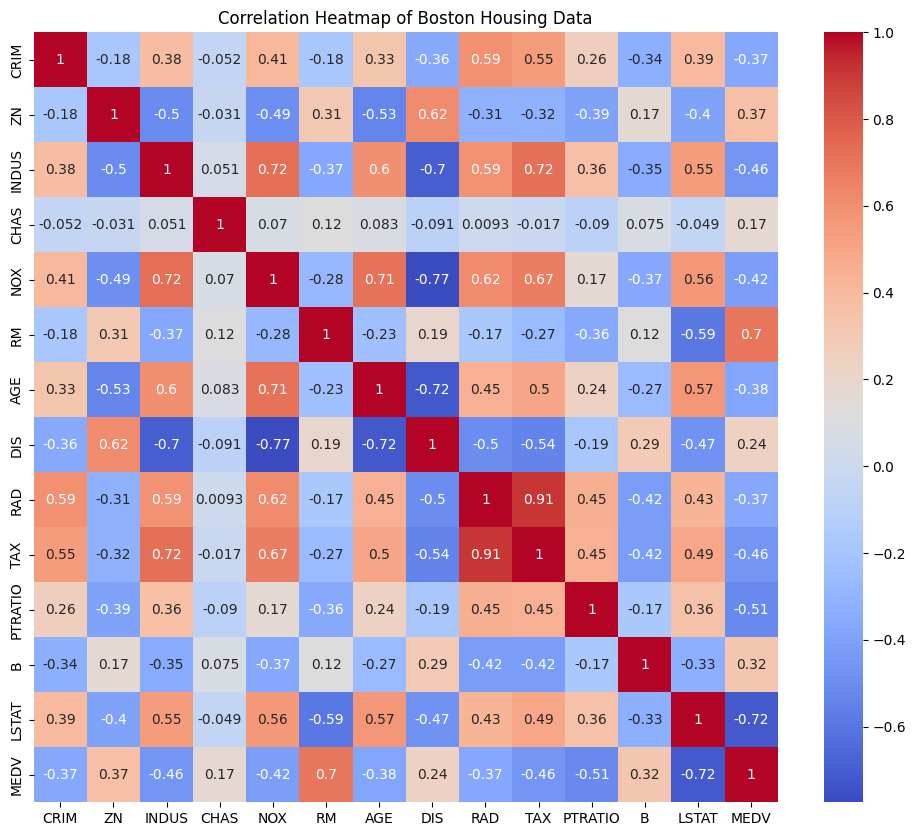

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()

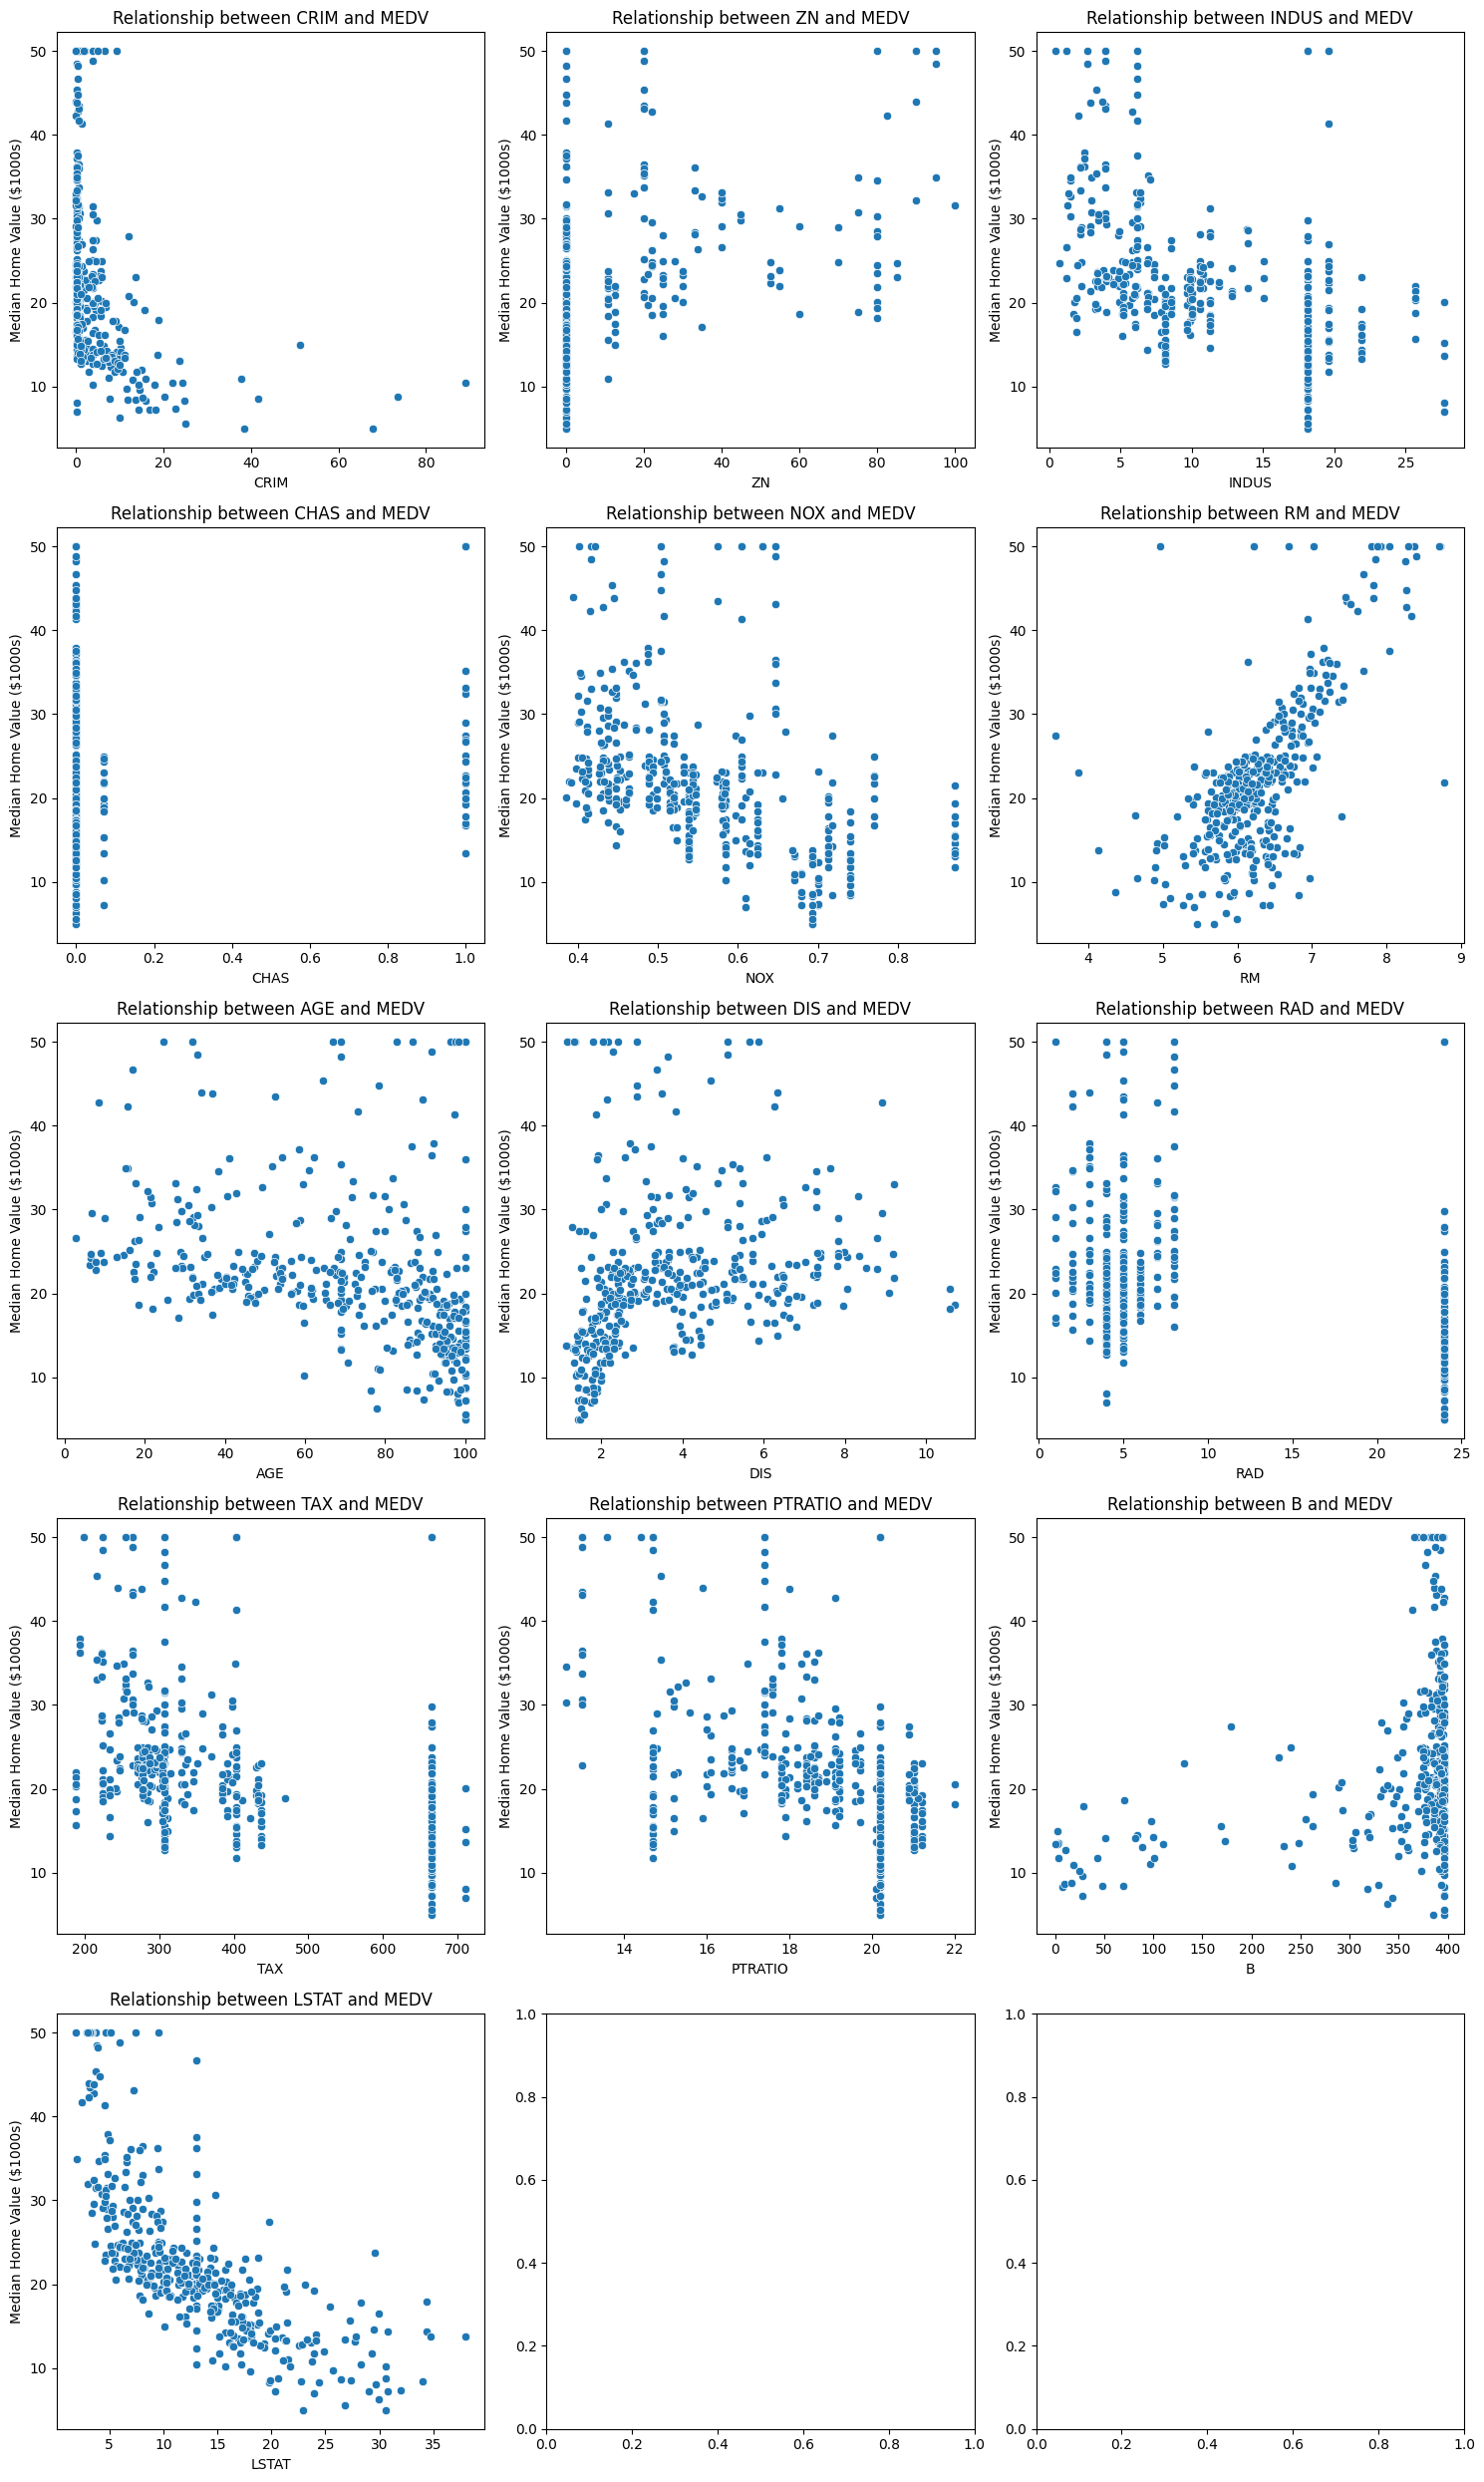

In [11]:
last_col = train_data.columns[-1]
num_cols = 3
num_rows = (len(train_data.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, header in enumerate(train_data.columns[:-1]):
    ax = axes[i]
    sns.scatterplot(data=train_data, x=header, y=last_col, ax=ax)
    ax.set_title(f"Relationship between {header} and {last_col}")
    ax.set_xlabel(header)
    ax.set_ylabel('Median Home Value ($1000s)')

fig.tight_layout()
plt.show()

### Data RegPlot

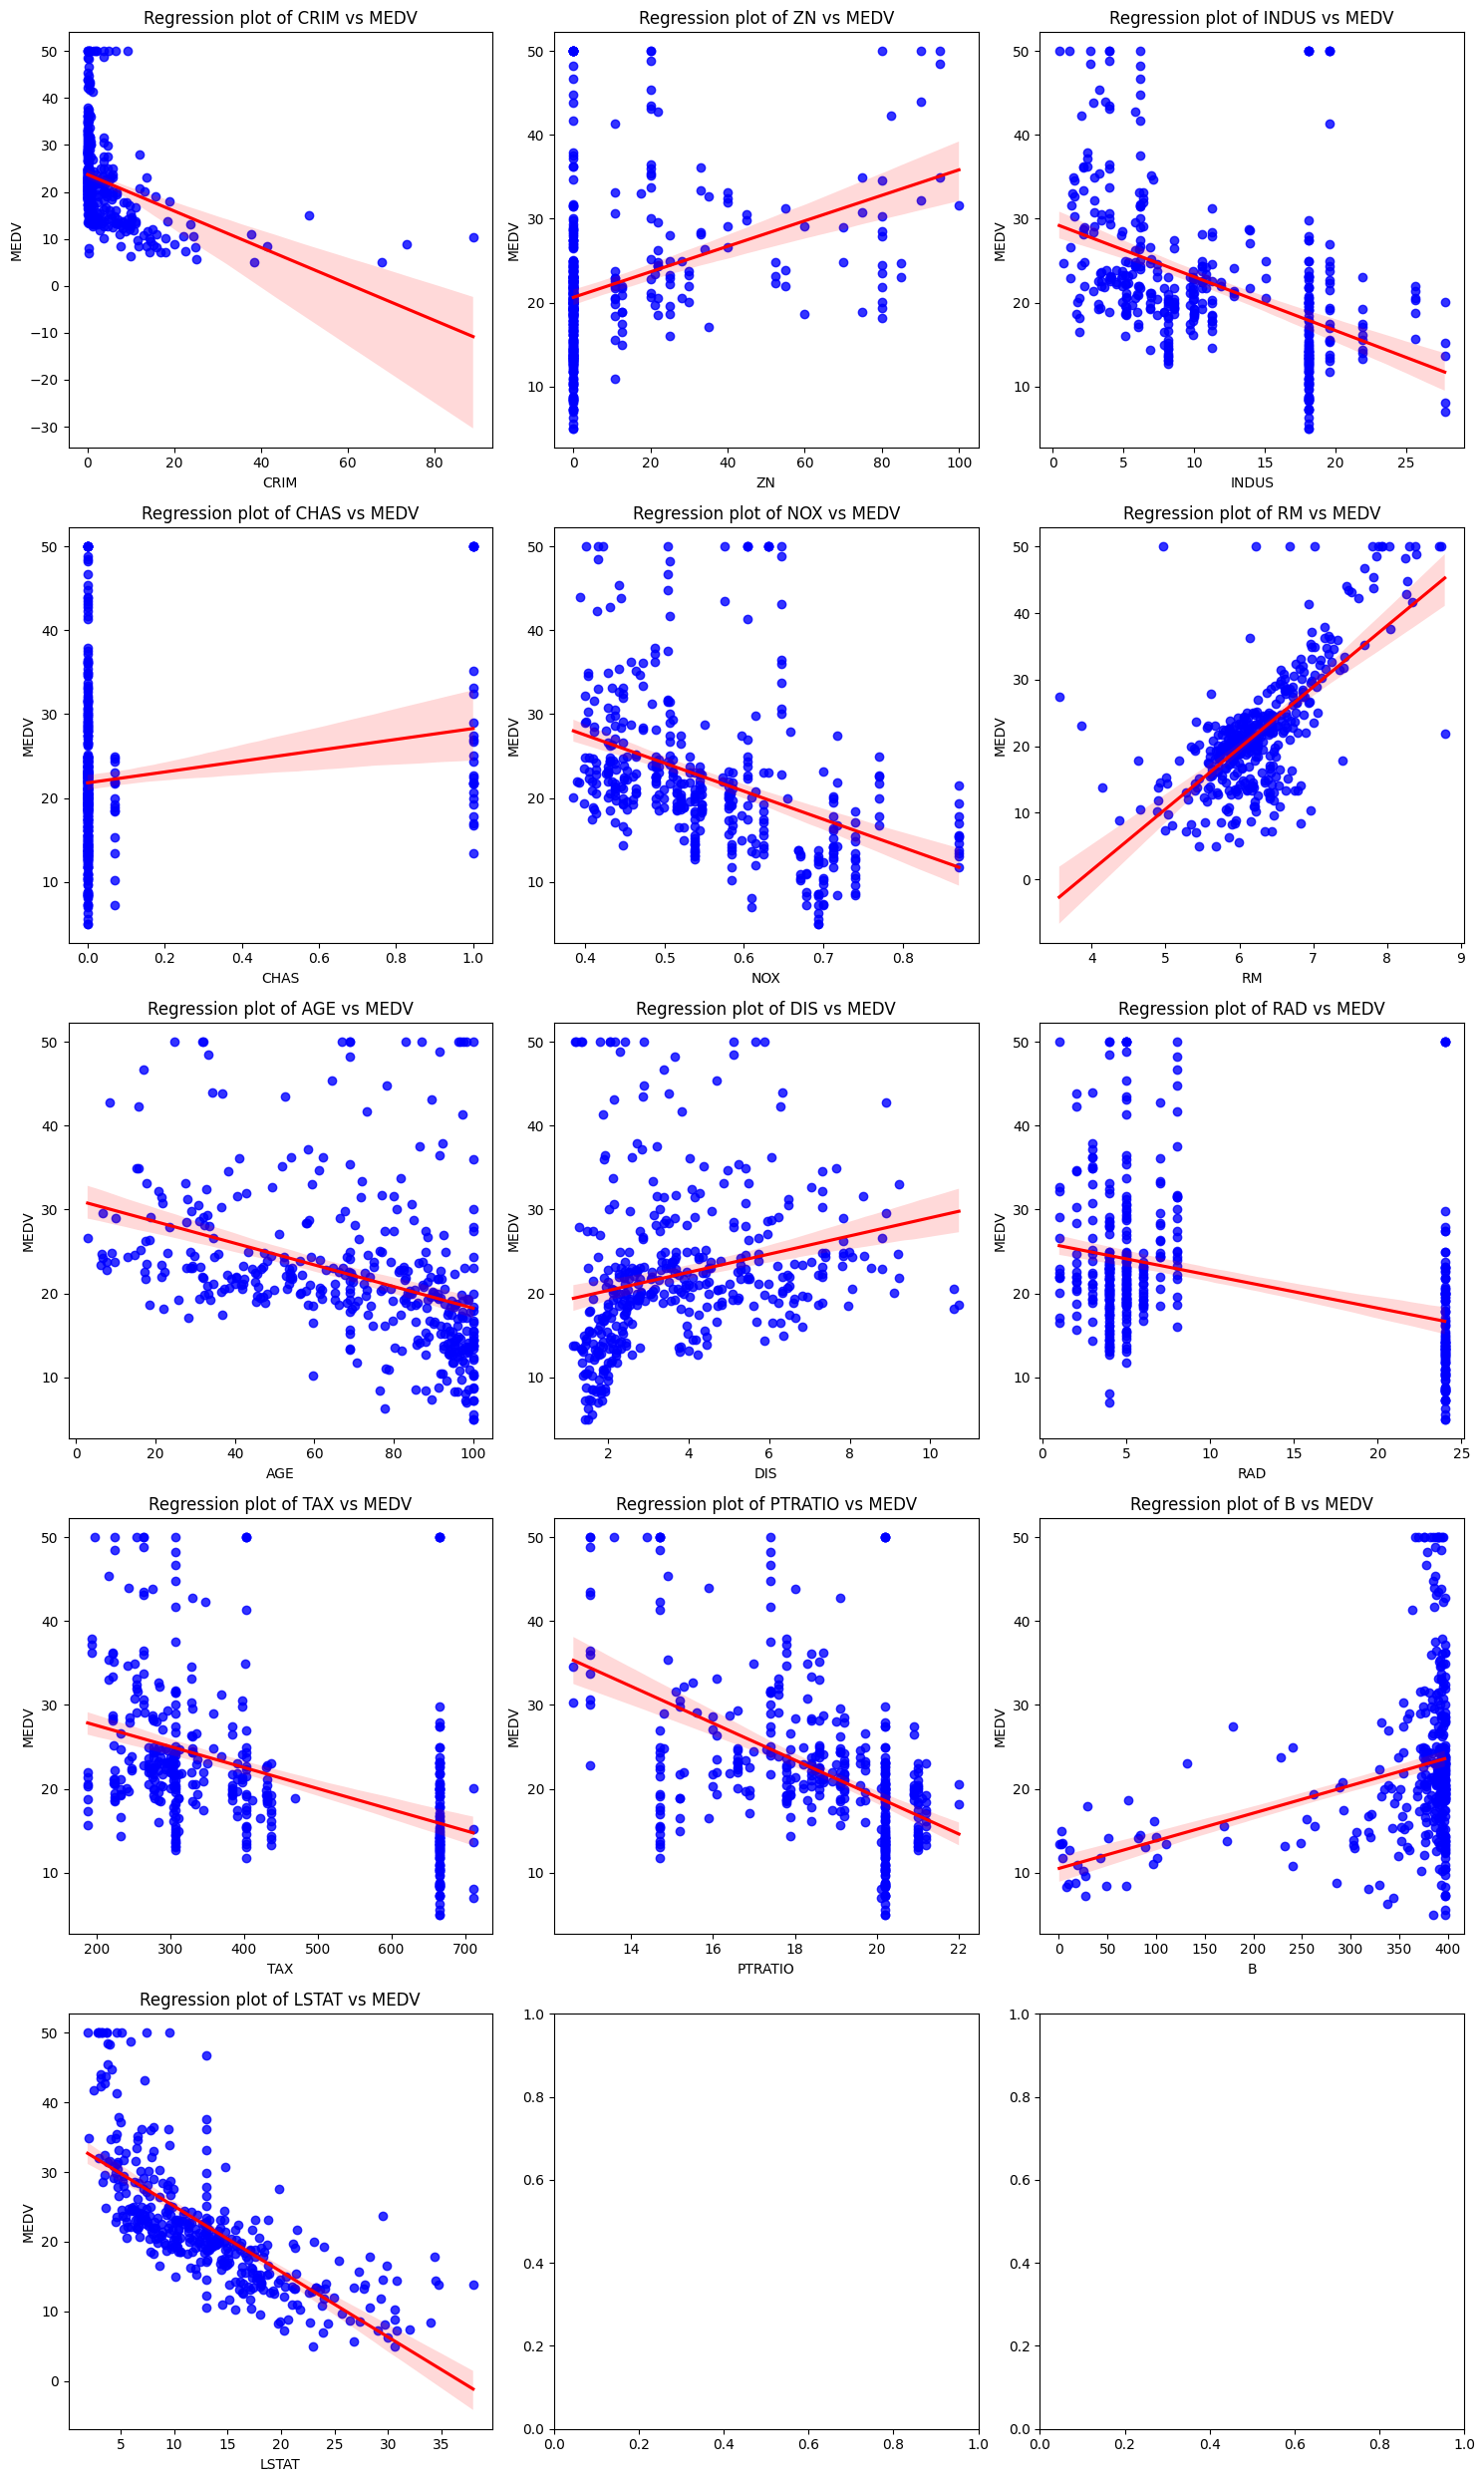

In [12]:
last_col = train_data.columns[-1]
num_cols = 3
num_rows = (len(train_data.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, header in enumerate(train_data.columns[:-1]):
    if i < len(axes):
        sns.regplot(data=train_data, x=header, y=last_col, ax=axes[i], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
        axes[i].set_title(f"Regression plot of {header} vs {last_col}")
        axes[i].set_xlabel(header)
        axes[i].set_ylabel(last_col)

fig.tight_layout()
plt.show()

### Data Normalization

Normalization of data with 2 method

In [13]:
def normalize(dataset, type):
    dataset_copy = dataset.copy()
    
    if type == 'min-max':
        for col_idx in range(dataset_copy.shape[1]):
            col = dataset_copy[:, col_idx]
            min_val = np.min(col)
            max_val = np.max(col)
            col_normalized = (col - min_val) / (max_val - min_val)
            dataset_copy[:, col_idx] = col_normalized
    elif type == 'z-score':
        for col_idx in range(dataset_copy.shape[1]):
            col = dataset_copy[:, col_idx]
            mean_val = np.mean(col)
            std_val = np.std(col)
            col_normalized = (col - mean_val) / std_val
            dataset_copy[:, col_idx] = col_normalized
    else:
        print("Invalid Normalization Method")
    
    return dataset_copy

### Extract Last Columns of Data as Ys + Normalization

In [14]:
X_train = train_data.iloc[:, :-1].values
Y_train = train_data.iloc[:, -1].values

X_train = normalize(X_train, 'z-score')

### Split Train Data into --> Train Set + Cross-Validation Set

In [15]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the data
shuffle_indices = np.random.permutation(len(X_train))
X_train_shuffled = X_train[shuffle_indices]
Y_train_shuffled = Y_train[shuffle_indices]

# Define the proportion of data to be allocated for cross-validation
val_split = 0.2

# Calculate the number of examples for the cross-validation set
num_val = int(val_split * len(X_train_shuffled))

# Split the data into training and cross-validation sets
X_train = X_train_shuffled[:-num_val]
Y_train = Y_train_shuffled[:-num_val]
X_val = X_train_shuffled[-num_val:]
Y_val = Y_train_shuffled[-num_val:]

# Linear Regression Model

In [16]:
class LinearRegression:
    def __init__(self, max_itertaions=1000, learning_rate=0.01, decay=0.9, epsilon=1e-5):
        self.max_iterations = max_itertaions
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.W = None
        self.b = None


    def RMSE(self, X, y):
        y_pred = self.predict(X)
        rmse = np.sqrt(((y_pred - y) ** 2).mean())
        return rmse
    

    def gradient_descent(self, X, y):
        m, n = X.shape

        dj_dW = np.zeros(n)
        dj_db = 0

        for i in range(m):
            y_pred = self.predict(X[i])
            dj_db += y_pred - y[i]
            dj_dW += (y_pred - y[i]) * X[i]

        dj_dW /= (np.sqrt(self.RMSE(X, y)) * 2 * m)
        dj_db /= (np.sqrt(self.RMSE(X, y)) * 2 * m)

        return dj_dW, dj_db



    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Parameters Intialization
        self.W = np.random.randn(n_features) * 0.01
        self.b = 0
        previous_loss = np.inf
        lr = self.learning_rate

        for _ in range(self.max_iterations):
            # Calculate Gradients
            dW, db = self.gradient_descent(X, y)

            # Update Parameters
            self.W -= lr * dW
            self.b -= lr * db

            # Check for Early Stop
            current_loss = self.RMSE(X, y)
            if np.abs(current_loss - previous_loss) < self.epsilon:
                print(f'Stopping Train at Iteration No.{_}')
                break

            previous_loss = current_loss
            lr *= 0.92

        print(f'Training Complete with score of {self.RMSE(X, y)}')


    def predict(self, X):
        # X.shape ==> (n_samples, n_features)
        # W.shape ==> (n_features, 1)
        y_pred = np.dot(X, self.W) + self.b
        return y_pred

### Create an instance of LinearRegression Model

In [17]:
max_iterations = 500
learning_rate = 3.5
decay = 0.85
epsilon = 1e-8

lr_model = LinearRegression(max_iterations, learning_rate, decay, epsilon)

### Train Model Using X_Train

In [18]:
lr_model.fit(X_train, Y_train)

Stopping Train at Iteration No.157
Training Complete with score of 4.664673824541827


### Extract Test Predictions into a .csv file

In [19]:
X_test = normalize(test_data.values, 'z-score')
y_predicted = lr_model.predict(X_test)

df = pd.DataFrame(y_predicted, columns=['MEDV'])
df.to_csv('house_pred.csv', index=False)

In [20]:
max_iterations_values = [100, 200, 500, 1000]
learning_rate_values = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
decay_values = [0.8, 0.85, 0.9, 0.95, 0.99]
epsilon_values = [1e-5, 1e-10]

best_score = float('inf')
best_hyperparameters = None

for max_iterations in max_iterations_values:
    for learning_rate in learning_rate_values:
        for decay in decay_values:
            for epsilon in epsilon_values:
                lr_model_test = LinearRegression(max_iterations, learning_rate, decay, epsilon)
                lr_model_test.fit(X_train, Y_train)

                # Evaluate the model on the validation set
                score = lr_model_test.RMSE(X_val, Y_val)

                # Check if the current combination of hyperparameters achieved a better score
                if score < best_score:
                    best_score = score
                    best_hyperparameters = (max_iterations, learning_rate, decay, epsilon)

print(f"Best Score: {best_score}")
print(f"Best Hyperparameters: {best_hyperparameters}")

Training Complete with score of 20.635434591432123
Training Complete with score of 20.63607430282304
Training Complete with score of 20.640890102512998
Training Complete with score of 20.635277768185784
Training Complete with score of 20.63259849613417
Training Complete with score of 20.63480507780643
Training Complete with score of 20.635472264094226
Training Complete with score of 20.632785223620722
Training Complete with score of 20.63606750823789
Training Complete with score of 20.63685242784601
Training Complete with score of 11.510261736329483
Training Complete with score of 11.512220904988693
Training Complete with score of 11.508058959872598
Training Complete with score of 11.509592491974807
Training Complete with score of 11.508886160672242
Training Complete with score of 11.508721960572462
Training Complete with score of 11.509513214997067
Training Complete with score of 11.509887012734673
Training Complete with score of 11.51039828192455
Training Complete with score of 11.50